# Week4 - Homework 2

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [207]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from collections import defaultdict

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


## Question 1:
### Which features can we use?

In [208]:
# analysis code
df.head()

,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0


In [209]:
df.tail()

,make,transmission,state,condition,odometer,auction_value,selling_price
9050,NaN,automatic,il,4.2,41186.0,NaN,11600.0
9051,ford,automatic,fl,NaN,38810.0,16250.0,17300.0
9052,nissan,NaN,ga,4.7,4551.0,12500.0,13800.0
9053,ford,automatic,il,4.6,33114.0,21800.0,27000.0
9054,ford,automatic,ga,3.7,23776.0,28800.0,29800.0


In [210]:
df.dtypes

,0
make,object
transmission,object
state,object
condition,float64
odometer,float64
auction_value,float64
selling_price,float64


Your explanation?

In [211]:
df.columns

Index(['make', 'transmission', 'state', 'condition', 'odometer',
       'auction_value', 'selling_price'],
      dtype='object')

In [212]:
df.isnull().sum()

,0
make,891
transmission,949
state,903
condition,882
odometer,877
auction_value,948
selling_price,0


In [213]:
df.sample(5)

,make,transmission,state,condition,odometer,auction_value,selling_price
5267,ford,automatic,mi,3.5,19590.0,16550.0,16100.0
4902,chevrolet,automatic,ca,4.0,85450.0,12900.0,16000.0
1062,ford,automatic,az,3.1,31401.0,16250.0,15500.0
7299,dodge,automatic,nc,3.6,53237.0,10450.0,10500.0
7611,dodge,automatic,fl,2.5,61691.0,NaN,10200.0


Your explanation?
Answer: I removed state as its not relevant when predecting the selling price.

In [214]:
from sklearn.model_selection import train_test_split
features = [ 'make','transmission','condition','odometer','auction_value'
    # enter features you selected
]

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
condition
odometer
auction_value


## Question 2:
Split the features into two lists, one for the numerical features and another for the categorical features.

In [215]:
# insert code here
Numerical = [col for col in df.columns if df[col].dtype == 'float64']
Categorical = [col for col in df.columns if df[col].dtype == 'object']

Categorical.remove('state')
Numerical.remove('selling_price')

print('The numerical features:', Numerical)
print('The categorical features:', Categorical)

The numerical features: ['condition', 'odometer', 'auction_value']
The categorical features: ['make', 'transmission']


## Question 3:
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [216]:
# insert code here
#To create the pipeline and missing values to be replaced with the median
numvar_pipeline = Pipeline([('handling_missing_values', SimpleImputer(strategy='median')),('value_scaling', StandardScaler())])

## Question 4:
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [217]:
# insert code here
#To craete a pipeline to replace missing values with most frequent
#Then using one-hot encoding to convert the categorical data to numerical arrays

catvar_pipeline = Pipeline([('handling_missing_values', SimpleImputer(strategy='most_frequent')),('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))])

## Question 5:

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [218]:
# insert code here
#To create one data processing pipeline by binding numerical and categorical pipelines

data_processing_pipeline = ColumnTransformer(transformers=[('Numerical_pipe',numvar_pipeline, Numerical),('Categorical_pipe', catvar_pipeline, Categorical)])
print('Combined data pre-processing pipeline:', data_processing_pipeline)

Combined data pre-processing pipeline: ColumnTransformer(transformers=[('Numerical_pipe',
                                 Pipeline(steps=[('handling_missing_values',
                                                  SimpleImputer(strategy='median')),
                                                 ('value_scaling',
                                                  StandardScaler())]),
                                 ['condition', 'odometer', 'auction_value']),
                                ('Categorical_pipe',
                                 Pipeline(steps=[('handling_missing_values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['make', 'transmission'])])


In [219]:
transform_X = data_processing_pipeline.fit_transform(X)
encode_cat = data_processing_pipeline.named_transformers_['Categorical_pipe'].named_steps['encoder'].get_feature_names_out(Categorical)
allfeatures = Numerical + list(encode_cat)
transform_data = pd.DataFrame(transform_X, columns=allfeatures)
print(transform_data)

      condition  odometer  auction_value  make_chevrolet  make_chrysler  \
0      1.333059 -0.185336      -0.191185             0.0            0.0   
1     -0.081007 -0.410985       0.249020             0.0            0.0   
2     -0.723764 -0.314109       0.452192             0.0            0.0   
3      0.176096 -0.362234      -0.516260             0.0            0.0   
4     -1.237969 -0.406528       1.657678             0.0            0.0   
...         ...       ...            ...             ...            ...   
9050   0.561750 -0.000498      -0.245364             0.0            0.0   
9051   0.176096 -0.083236       0.066166             0.0            0.0   
9052   1.204507 -1.276220      -0.441764             0.0            0.0   
9053   1.075956 -0.281585       0.817901             0.0            0.0   
9054  -0.081007 -0.606757       1.766037             0.0            0.0   

      make_dodge  make_ford  make_honda  make_hyundai  make_kia  make_nissan  \
0            0.0   

In [220]:
transform_data.isnull().sum()

,0
condition,0
odometer,0
auction_value,0
make_chevrolet,0
make_chrysler,0
make_dodge,0
make_ford,0
make_honda,0
make_hyundai,0
make_kia,0


## Question 6:

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [221]:
LRM_pipeline = Pipeline([('processing_pipeline', data_processing_pipeline), ('LRM', LinearRegression())])
print(LRM_pipeline)

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('Numerical_pipe',
                                                  Pipeline(steps=[('handling_missing_values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('value_scaling',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('Categorical_pipe',
                                                  Pipeline(steps=[('handling_missing_values',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                           

In [222]:
LRM_pipeline.fit(X_train, y_train)
testing_transformX = data_processing_pipeline.transform(X_test)
sellprice_Predection = LRM_pipeline.predict(X_test)

In [223]:
R2 = r2_score(y_test, sellprice_Predection)
print('R2 value:', R2)

R2 value: 0.8844724016792995


Report what the  𝑅2  is using the test data ->R2 is the metric to indicate how well the model fits the data

## Question 7:

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

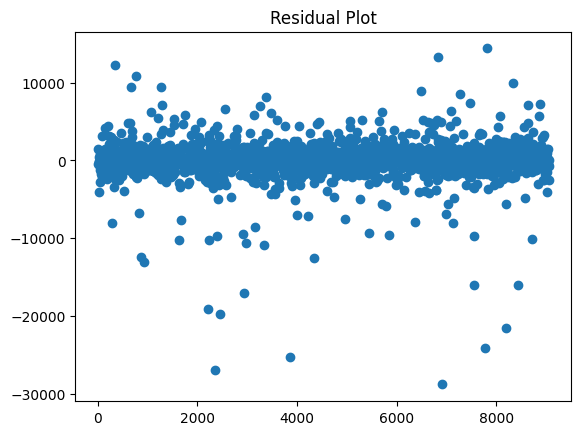

In [224]:
# insert code here
residual = sellprice_Predection-y_test
plt.plot(residual, marker='o', linestyle='')
plt.title('Residual Plot')
plt.show()

Insert description here.

1. most values are near zero means the performance of model is good.
2. there are few outliers as observed which may impact the predection

## Question 8:

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [225]:
RRM_pipeline = Pipeline([('ridge_processing', data_processing_pipeline),('Ridgepipeline', Ridge(alpha=0))])
RRM_pipeline.fit(X_train, y_train)
RRM_pipeline['Ridgepipeline'].coef_

array([  898.93686386,  -233.35263989,  6835.17976382, -1978.6085442 ,
       -2250.56338671, -2049.35457704, -1916.97423571, -1955.97411384,
       -2604.79462891, -2836.08999385, -2371.67366947, -1908.11545878,
        -586.4595733 ])

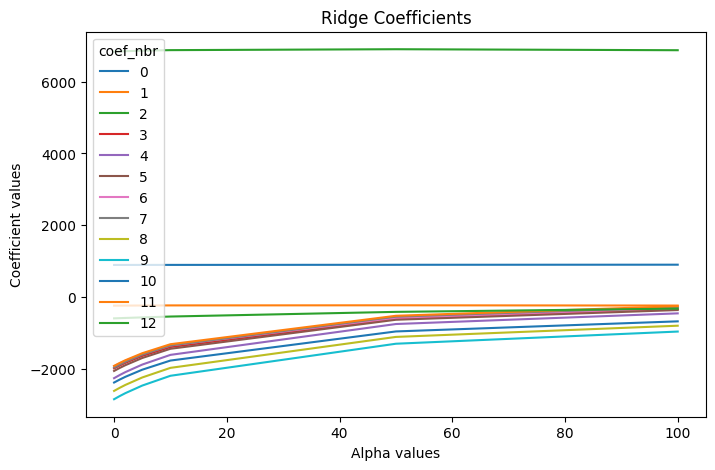

In [226]:
Alpha_val = [0, 1, 2, 5, 10, 50, 100]
endresult = defaultdict(dict)
for alpha in Alpha_val:
  RRM_pipeline = Pipeline([('ridge_processing', data_processing_pipeline),('Ridgepipeline', Ridge(alpha=alpha))])
  RRM_pipeline.fit(X_train, y_train)
  endresult['coeff'][alpha] = RRM_pipeline['Ridgepipeline'].coef_
  endresult['train score'][alpha] = RRM_pipeline.score(X_train, y_train)
  endresult['test score'][alpha] = RRM_pipeline.score(X_test, y_test)

Ridge_coef = pd.DataFrame.from_dict(endresult['coeff'])
Ridge_coef = Ridge_coef.reset_index()
Ridge_coef = Ridge_coef.rename(columns={'index':'coef_nbr'})
Ridge_coef = Ridge_coef.melt(id_vars='coef_nbr', var_name='Alpha_val', value_name='coef')
(Ridge_coef.pivot_table(index='Alpha_val', columns='coef_nbr', values='coef').plot(figsize=(8,5)))

plt.title('Ridge Coefficients')
plt.xlabel('Alpha values')
plt.ylabel('Coefficient values')
plt.show()

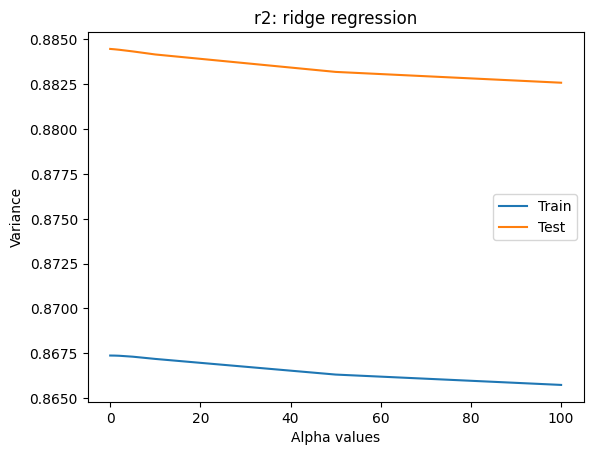

In [227]:
Ridge_R2train = pd.Series(endresult['train score'])
Ridge_R2test = pd.Series(endresult['test score'])
Ridge_R2train.plot()
Ridge_R2test.plot()
plt.title('r2: ridge regression')
plt.legend(['Train','Test'])
plt.xlabel('Alpha values')
plt.ylabel('Variance')
plt.show()